<a href="https://colab.research.google.com/github/magrathealabs/university/blob/finish-class-1-and-2/digital-image-processing/class2_DIP_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 2 (Processamento de Imagens Digitais)

## Sumário

3. Transformações de intensidade e filtragem espacial
  - Algumas funções de transformação de intensidade básicas
    - Negativa da imagem
    - Transformação logarítima
    - Transformação gamma
  - Processamento de histogramas
    - Histograma da imagem
    - Equalização de histogramas
  - Fundamentos sobre filtragem espacial
    - Convolução
    - Filtro de suavização
    - Filtro de aguçamento
4. Filtragem no domínio de frequencia
  - Dominio espacial e domínio de frequência
  - Filtro passa-baixa (suavização)
  - Filtro passa-alta (nitidez)
  - Diferenças entre filtragem no domínio espacial e de frequência
    - Ideal
    - Gaussian
    - Butterworth
    - Laplacian
    - Filtro homomórfico (modelo de iluminância-refletância)
    - Notch 
    - Filtros de difusão anisotrópica

In [0]:
!pip3 install opencv-python 
!pip3 install matplotlib   
import urllib.request
import cv2
import numpy as np         
import pandas as pd        
import matplotlib.pyplot as plt

In [0]:
def read_image_from_drive(url, type):
  resp = urllib.request.urlopen(url)
  img_byte = np.asarray(bytearray(resp.read()), dtype="uint8")
  if type == 0:
    return cv2.imdecode(img_byte, cv2.IMREAD_GRAYSCALE)
  else:
    img = cv2.imdecode(img_byte, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

def plot_images_inline(imgs):
  fig = plt.figure()
  for n, img in enumerate(imgs):
      fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
      plt.imshow(img, cmap='gray')

  fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
  plt.show()

## Transformações de intensidade e filtragem espacial

### Algumas funções de transformação de intensidade básicas

#### Negativa da imagem

  - Uma imagem positiva é uma imagem normal. A negativa de uma image é a inversão total da imagem, onde areas claras se tornam escuras e vice-versa.
      
      <br>
<img width="200" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1I4ntU0Fq_THBa-yIZk6Q7hc36muqw0_I">
      <img width="300" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1-h-m2t1zRsU0GgQOS7ontNWiTe3MzAPM">
  

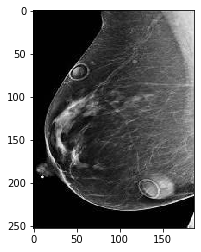

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1_WztCD59xPrNufMG83jiVfFa2bqjbVK0', 0)

plt.imshow(img, cmap='gray')

Para transformar uma imagem para sua negativa utizamos a função [`bitwise_not`](https://docs.opencv.org/trunk/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f). A negativa de uma imagem serve para evidenciar detalhes que muitas vezes não são visíveis em sua forma original


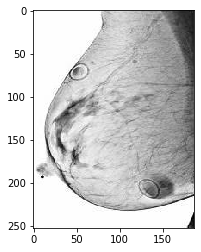

In [0]:
img_not = cv2.bitwise_not(img)

plt.imshow(img_not, cmap='gray')

A seguir vamos ver algumas tranforções para realce de contraste
<br>
<img width="800" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1LHnEK2fCe4fJgiojJOBG7PPMWmFblarX">

Pra exemplificar, vamos utilizar a seguinte imagem


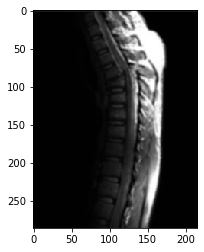

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1p-TkesKrgdkNW6TTa_g6vlkvnevxM-Tu', 1)

img = cv2.blur(img, (3, 3))
plt.imshow(img)

#### Tranformação logarítimica

  - Mapeia uma faixa estreita de baixos valores de intensidade em uma faixa mais ampla. O oposto se aplica aos valores mais altos de níveis de intensidade de entrada. 
  - O mapeamento logarítmico de valores de níveis de cinza é útil para aumento de contraste em feições escuras (valores de cinza baixos)
  - É usado para aumentar os detalhes (ou contraste) dos valores de intensidade mais baixa. a fórmula é:
    
    $g = c*log(1 + double(f))$
    
    $onde,$

    $c = constant$

    $f = original$ $image$

    $g = transformed$ $image$
     
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


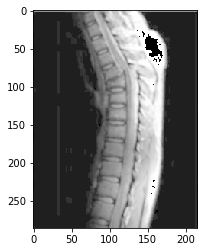

In [0]:
log_transformed = c * np.log(1 + img)
log_transformed = np.array(log_transformed, dtype = np.uint8) 

plt.imshow(log_transformed)

#### Tranformação de potência (gamma)

- Função que mapeia os níveis de luminância para compensar o efeito de luminância não linear dos dispositivos de exibição

    $s = c*r^γ$
      
    - s: pixel de saída
    - c: constante
    - r: pixels de entrada
    - γ: valor gamma
      
     

Através do valor gamma podemos controlar a compesação do efeito de luminância. Para valores 



Divide-se todos os elementos da imagem original por 255. Assim, cada elemento tem valor menor que um. Em seguida aplica-se a função [`pow`](https://docs.opencv.org/trunk/d2/de8/group__core__array.html#gaf0d056b5bd1dc92500d6f6cf6bac41ef) que eleva todos os elementos a um expoente específico. Usamos 0.2, então é uma raiz quadrada. Após, transformamos a imagem para seu intervalo original

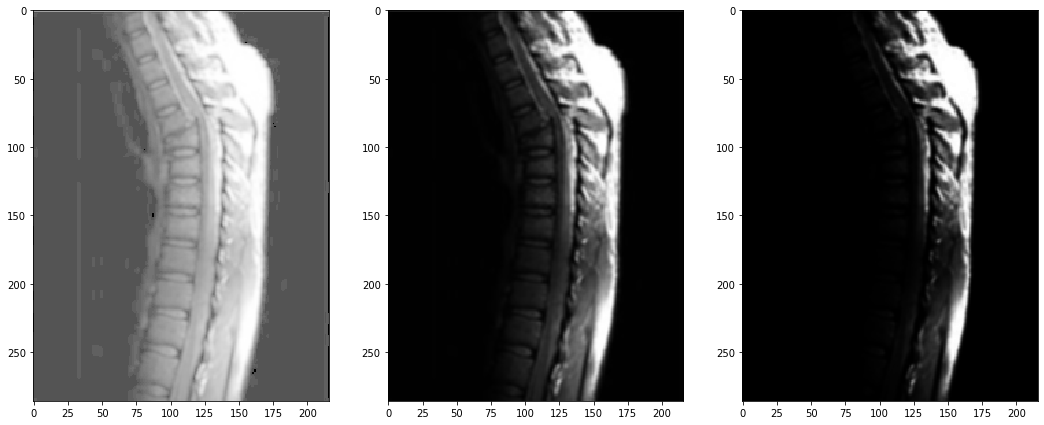

In [0]:
img_norm = img/255.0

img_gamma_1 = cv2.pow(img_norm, 0.2)
img_gamma_1 = np.uint8(img_gamma_1*255)

img_gamma_2 = cv2.pow(img_norm, 1)
img_gamma_2 = np.uint8(img_gamma_2*255)

img_gamma_3 = cv2.pow(img_norm, 2)
img_gamma_3 = np.uint8(img_gamma_3*255)
  
plot_images_inline([img_gamma_1, img_gamma_2, img_gamma_3])

#### Exercício #8
  - Utilizar técnicas de tranformação de intensidade para chegar o mais próximo possível da imagem (c)

 <br>
      <center><img width="500" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1PcXOfs98t58CTObKPI-tZlA1_H6k8g7Y"></center>

  - Link para ler a imagem: https://docs.google.com/uc?export=download&id=1ZnPgFOFw77SMor9Um6gCohxhJUv-gCzP

### Processamento de histogramas

#### Histograma de uma imagem

  - Representação gráfica da probabilidade de ocorrência dos valores de intensidades na imagem
      
      <br>
     <center><img width="400" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1OPryt8GCFQJ5y0RvWRjlsOeE0SOcVQJz"></center>
     

A seguir vamos analizar dois histogramas, primeiro um com sombras

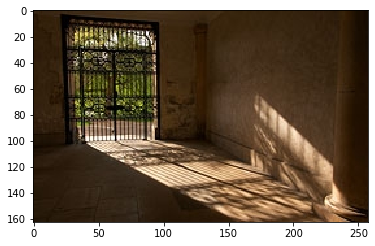

In [0]:
low_key = read_image_from_drive('https://docs.google.com/uc?export=download&id=1cxV9uq2z9G-sUx137mxuafWkc3KyC4ZX', 1)
plt.imshow(low_key)

Para calcular o histograma de uma imagem utliza-se a função [`ravel`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html) da biblioteca [`Numpy`](https://numpy.org/), que retorna um array "achatado", por exemplo, uma imagem é um array de várias dimensões

  `[[155, 34, .., 122], [123, 134, .., 45]]`

  Após a função `ravel`

  `[155, 34, .., 122, 123, 134, .., 45]`

  e a função [`hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) do [`matplotlib`](https://matplotlib.org/) apresenta o histograma da destes valores

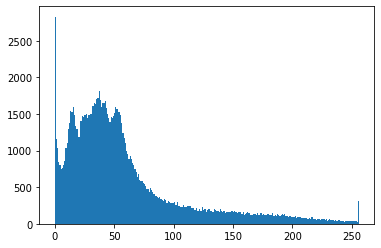

In [0]:
_ = plt.hist(low_key.ravel(),256,[0,256])

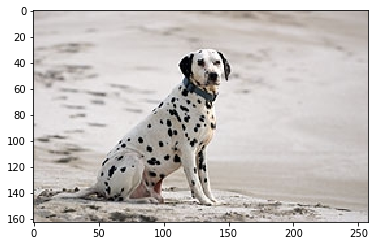

In [0]:
high_key = read_image_from_drive('https://docs.google.com/uc?export=download&id=1cbtqsjVRLrIDbXMlbt9NtfmpMFXSpkdL', 1)
plt.imshow(high_key)

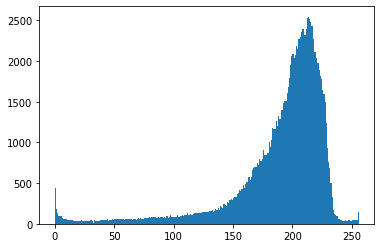

In [0]:
_ = plt.hist(high_key.ravel(),256,[0,256])

A partir desta análise de histogramas surgiu uma técnica muito utilizada para melhoramento de contraste a **equalização de histogramas**

### Equalização de Histogramas

  - Mudar a distribuição dos valores de ocorrência em um histograma permitindo uma redução das diferenças acentuadas e assim, acentuando detalhes não visíveis anteriormente
      
      <br>
     <center><img width="400" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1IwUDIALkwrY7RPlXeQqt1iZTqwUY91sZ"></center>
     
     

#### Exercício #9 
  - Utilizar a função [`equalizeHist`](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e) do OpenCV nas imagens anteriores `low_key` e `high_key`
  - Analizar o histograma de cada uma

Para fazer isto, você precisa primeiro transformar as imagens de RGB para o espaço de cor YCbCr utilizando a função [`cvtColor`](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab), pois este espaço de cor serpara os valores de intensidade dos componentes de cor da imagem. Então, é preciso separar os canais de cores utilizando a função [`split`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a) e aplica-se a função [`equalizeHist`](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e) no primeiro canal (canal[0])

Finalmente, juntamos os canais novamente utilizando a função [`merge`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d) resultando na imagem final.

## Fundamentos sobre filtragem espacial


### Convolução

  - **Convolução** é um dos conceitos mais importantes para ser fixado. Convolução é a base para o desenvolvimento de **redes neurais convolucionais**, sendo a técnica estado-da-arte para reconhecimento de objetos.
      - **Convolução** é simplesmente uma multiplicação por elementos de duas matrizes seguida por uma soma
      - **Kernel**: Uma imagem nada mais é que uma grande matrix, o kernal é uma matriz menor (normalmente 3x3), que é aplicada da esquerda para a direita e de cima para baixo ao longo da imagem original.
      
      <br>
     <center><img width="200" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1Djeb1RRFKrog29qS98s1qACWvo7MFjnX"></center>
     <br>
     <img width="800" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=12npDZXgeIyJuQTSN525p72AR6xxYK5MN">
     <img width="200" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1APtA4ron3pFLP57zQNwLh1Y91-hhYPhI">
 
         
    

Para realizar a convolução em uma imagem utilizamos a função [`filter2D`](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04), passndo os seguintes parâmetros
  - A imagem que queremos aplicar o filtro
  - O parâmetro _depth_ (tipo dos dados), normalmente é -1, ou seja o mesmo da imagem de entrada
  - e o Kernel a ser utilizado

Para exemplificar, vamos aplicar o filtro de laplaciano (_laplacian filter_) na seguinte imagem

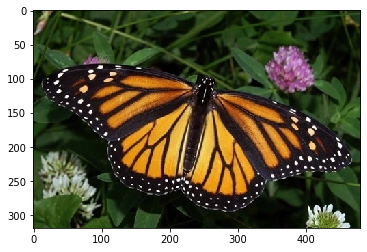

In [0]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1aRETO-NbCFypwfsLj-LZ3Tgta8-oX66n', 1)

plt.imshow(img)

Primeiramente vamos criar o kernel

In [0]:
laplacian_kernel = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

Agora vamos utilizar a função [`filter2D`](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)

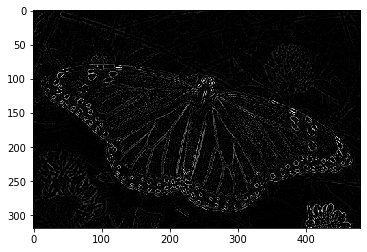

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

dst = cv2.filter2D(gray,-1,laplacian_kernel)

plt.imshow(dst, cmap='gray')

#### Exercício #10
  - Aplicar os filtros convulacionais seguintes na imagem da borboleta

   <br>
<img width="400" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1Mmp9x6kY2b6FqdS3gJll7n5vMwpLZzuA"
     <br> 

  - Neste link você pode testar diversos _kernels_!
    - http://matlabtricks.com/post-5/3x3-convolution-kernels-with-online-demo#demo


## Filtragem no domínio de frequencia

### Dominio espacial e domínio de frequência

- Domínio Espacial
  <br>
  <center><img width="800" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1F6W4EdoiCcGicuE08nW0959dqiPG1-J4"></center>
     
- Domínio de Frequência
  <br>
  <img width="800" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1yEiNXwWAaVP08olrC8LUXW_jkQFtcqL4">
 


Primeiro, transformamos a imagem para o domínio de frequência. Um sinal pode ser convertido do domínio do tempo para o domínio da frequência usando operadores matemáticos chamados transformações. Existem muitos tipos de transformação que fazem isso. O mais utilizado é a **transformação de Fourier**. 




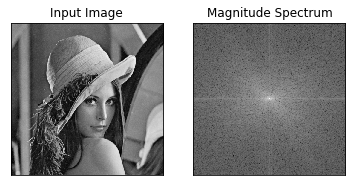

In [0]:
img = read_image_from_drive("https://docs.google.com/uc?export=download&id=1AQnsvwckAAS4ILKBFbARXFtmlWf6B19P", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Acima temos a imagem no **domínio de espacial** e no **domínio de frequência**, agora podemos aplicar filtros para suavização e aguçamento. No domínio de frequência, trabalhamos com as **altas** e **baixas** frequências, sendo que:
  - **Alta frequência**: contém informações sobre bordas na imagem
    - Encontra-se mais na **extremidade da imagem**
  - **Baixa frequência**: contém informações sobre regiões suaves da imagem
    - Encontra-se mais no **centro da imagem (origem)**

Assim, temos os filtros:
  - **Filtro passa-baixa** para suavização
  - **Filtro passa-alta** para aguçamento

Após a filtragem, é feita a transformação inversa, onde a imagem é convertida para o domínio espacial novamente

### Filtro passa-baixa (suavização)

  - Deixa passar todas as frequências em um círculo de raio $D_o$ a partir da origem e "recorta" todas as frequências fora desse círculo 

    <br>
  <img width="400" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1ISSgUCoSPTabqlRPwUzirVIfn30OVapD">



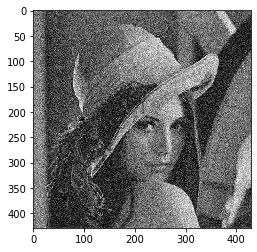

In [0]:
img = read_image_from_drive("https://docs.google.com/uc?export=download&id=1K9D6-rShrLGLYzMQ48ljlxtqGa5iEwA0", 0)

plt.imshow(img, cmap='gray')

Em seguida, aplicamos a transformada de Fourier utilizando a função [`dft`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d) do OpenCV e a função [`fft.fftshift`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fft.fftshift.html) do Numpy e apresentamos o espectro

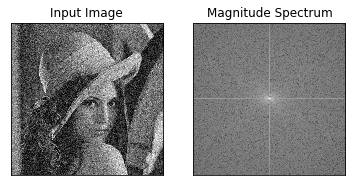

In [0]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Pegamos o centro da imagem para criar a máscara


In [0]:
rows, cols = img.shape
crow, ccol = rows/2 , cols/2

Criamos a máscara efetivamente

In [0]:
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 1

Aplicamos a máscara

In [0]:
fshift = dft_shift*mask

Aplicamos a transformada de Fourier inversa e apresentamos a imagem

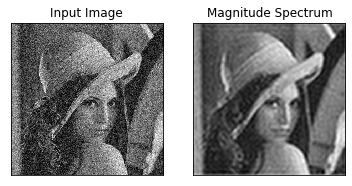

In [0]:
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)

img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### Filtro passa-alta (aguçamento)

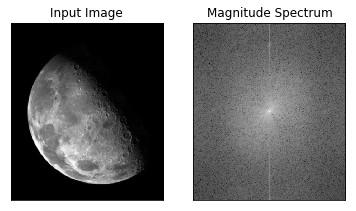

In [0]:
img = read_image_from_drive("https://docs.google.com/uc?export=download&id=1Trqmq4K4sK-3bOfIyeJ5gOmbXuaJif6h", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


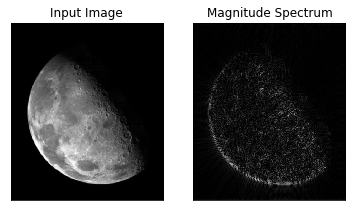

In [0]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Diferenças entre filtragem no domínio espacial e de frequência
  - ### A princiapal diferença é que no domínio espacial o filtro é aplicado utilizando convolução, que é um processo que deve ser aplicado  por toda imagem tendo um custo computacional maior que no domínio de frquência onde o filtro é aplicado de uma uníca vez. Por outro lado, no domínio de frequêcia temos que aplicar a transformada de Fourier que tem um custo computacional elevado, sendo assim depende do contexto da aplicação
    - #### Alguns exemplos onde pode-se ter vantagem com a filtragem no domínio de frequência
      - #### Redução de ruído, reorientação, extração de energia, suavização, compressão entre outros. 
      
      - #### A filtragem de frequência é melhor em quase todos estes casos. Com o uso de uma boa biblioteca de álgebra linear (ou GPU) pode ser feito com muita eficiência e confiabilidade.
      
      https://www.quora.com/What-can-frequency-filtering-do-for-images-that-spatial-filtering-cant-do

## Tipos de filtros 
  - ### Ideal
  - ### Gaussian
  - ### Butterworth
  - ### Laplacian
  - ### Filtro homomórfico (modelo de iluminância-refletância)
  - ### Notch 
  - ### Filtros de difusão anisotrópica